In [16]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [2]:
plt.rcParams['figure.figsize'] = (16.0, 8.0)

In [36]:
T = 1000
h = 1
sigma = 20
M = 10
Z_0 = 1000
V_0 = -200

  0%|          | 0/1000 [00:00<?, ?it/s]

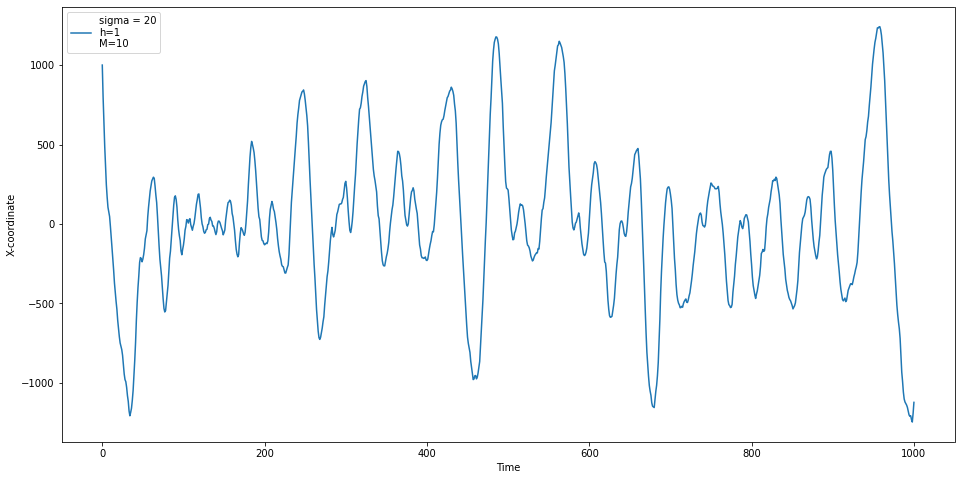

In [37]:
N = int(T / h + 1.5)
std = sigma / np.sqrt(h)
noise = np.random.randn(N) * std
Z = np.zeros((N))
V = np.zeros((N))
Z[0] = Z_0
V[0] = V_0
for i in tqdm(range(N-1)):
    if not (Z[i] or V[i]):
        w = 0
    elif (2 * M * Z[i] > V[i] * V[i]) or ((V[i] >= 0) and (- 2 * M * Z[i] <= V[i] * V[i])):
        w = -M
    else:
        w = M
    Z[i+1] = Z[i] + h * V[i]
    V[i+1] = V[i] + h * (w + noise[i])
X = np.arange(0, T + h/2, h)
plt.plot(X, Z, label='sigma = {}\nh={}\nM={}'.format(sigma, h, M))
plt.xlabel("Time")
plt.ylabel("X-coordinate")
plt.legend(loc='best')
plt.show()

  0%|          | 0/100 [00:00<?, ?it/s]

No handles with labels found to put in legend.
No handles with labels found to put in legend.


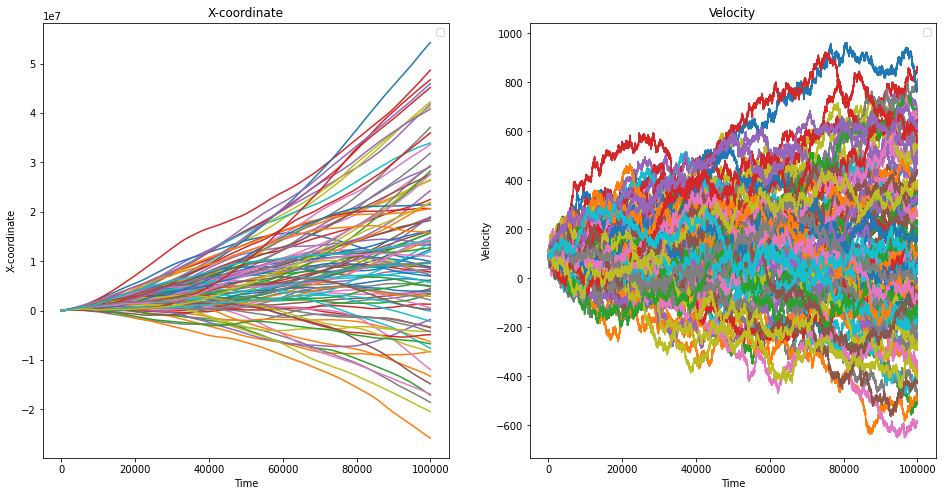

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2)
N = int(T / h + 1.5)
std = sigma / np.sqrt(h)
for i in tqdm(range(100)):
    noise = np.random.randn(N) * std
    Z = np.zeros((N))
    V = np.zeros((N))
    Z[0] = Z_0
    V[0] = V_0
    for i in range(N-1):
        Z[i+1] = Z[i] + h * V[i]
        V[i+1] = V[i] + h * noise[i]
    X = np.arange(0, T + h/2, h)
    ax1.plot(X, Z)
    ax2.plot(X, V)


plt.axes(ax1)
plt.title("X-coordinate")
plt.xlabel("Time")
plt.ylabel("X-coordinate")
plt.legend(loc='best')
plt.axes(ax2)
plt.title("Velocity")
plt.xlabel("Time")
plt.ylabel("Velocity")
plt.legend(loc='best')
plt.show()